3a

Rayleigh–Bénard convection occurs when a fluid layer is heated from below and cooled from above, causing buoyancy-driven circulatory flows. Once the temperature difference exceeds a critical threshold, the system can transition from steady conduction to complex, and sometimes chaotic, convective cells. The Lorenz system is a simplified mathematical model that captures these essential chaotic dynamics by describing how the fluid’s velocity and temperature gradients evolve over time.

x is Flow velocity (rate of convection).

y is Horizontal temperature/velocity variation.

z is Vertical temperature difference.

σ is Prandtl number (ratio of momentum to thermal diffusivity).

ρ is Rayleigh number (strength of the temperature difference).

β is Geometrical factor related to the shape of the convective cells.



3b

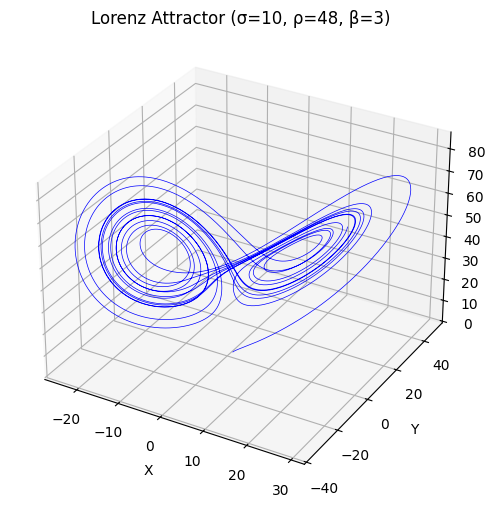

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

sigma = 10
rho = 48
beta = 3

# Initial condition 
initial_state = [1.0, 1.0, 1.0]

# Time range
t = np.linspace(0, 12, 10000)  # 10,000 points from 0 to 12

solution = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))

# Extract x, y, z
x_vals = solution[:, 0]
y_vals = solution[:, 1]
z_vals = solution[:, 2]

# 3D Plot 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, color='b', lw=0.5)

ax.set_title(f"Lorenz Attractor (σ={sigma}, ρ={rho}, β={beta})")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()


3c

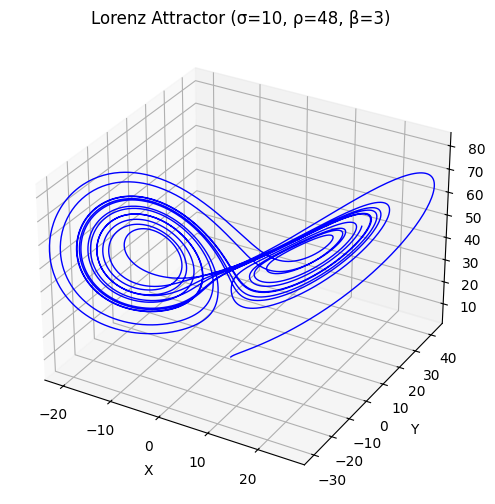

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
import matplotlib.animation as animation

def lorenz_system(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10
rho = 48
beta = 3
initial_state = [1.0, 1.0, 1.0]

# Time range
t_final = 12
num_points = 8000
t = np.linspace(0, t_final, num_points)

# Solve the Lorenz system
solution = odeint(lorenz_system, initial_state, t, args=(sigma, rho, beta))
x_vals = solution[:, 0]
y_vals = solution[:, 1]
z_vals = solution[:, 2]

# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(min(x_vals), max(x_vals))
ax.set_ylim(min(y_vals), max(y_vals))
ax.set_zlim(min(z_vals), max(z_vals))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(f"Lorenz Attractor (σ={sigma}, ρ={rho}, β={beta})")

# Initialize the line object that will be updated
line, = ax.plot([], [], [], 'b-', lw=1)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line,

def animate(i):
    line.set_data(x_vals[:i], y_vals[:i])
    line.set_3d_properties(z_vals[:i])
    return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, frames=num_points, init_func=init,
    interval=20, blit=True
)

ani.save('lorenz_trajectory.gif', writer='pillow', fps=30)
plt.show()
